In [20]:
import pandas as pd
import numpy as np
import re
from datetime import timedelta
import seaborn as sns

In [33]:
path = "C:\\Users\\97254\\Desktop\\phyton\\exc2\\matala2\\"
filename = "matala2_cosmetics_2019-Nov.csv"
datafile =  path + filename
data = pd.read_csv(datafile)
data= data.dropna(subset = ["user_session"])
data= data.dropna(subset = ["event_time"])
data= data.dropna(subset = ["price"])
data= data.dropna(subset = ["user_id"])
data = data.reset_index()
#data = data.iloc[0:30000,:]

c:\users\97254\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


q1

In [49]:
data['event_time'] = pd.to_datetime(data['event_time'])
data = data.sort_values(['user_session', 'event_time'])
data1 = data.groupby('user_session')
data['duration_to_next_event'] = data1['event_time'].shift(-1) - data['event_time']
data.loc[data.groupby('user_session').tail(1).index, 'duration_to_next_event'] = pd.to_timedelta(0)
data['duration_to_next_event'] = data['duration_to_next_event'].dt.total_seconds() 


In [50]:
data

,index,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,time_diff,funnel_number,index_in_funnel
522674,522763,2019-11-05 07:57:05+00:00,view,5829298,1487580011585077370,NaN,farmstay,0.79,556321594,00000dd2-0f5d-4fc9-9d6b-2fc8c7514b04,0.0,-22 days +22:07:38,1,1
1443297,1443597,2019-11-11 12:15:10+00:00,view,5771614,2193074740619379535,furniture.living_room.cabinet,kosmekka,150.79,570103701,00001bc6-1e04-4861-be5d-1bc73929c21a,0.0,0 days 00:24:11,1,2
1932736,1933123,2019-11-15 03:50:03+00:00,view,5568472,1487580005595612013,NaN,NaN,3.0,571677620,00001e77-5db8-4e96-ab7a-022ed3caf8b3,0.0,0 days 00:00:03,1,1
1662086,1662416,2019-11-13 04:37:37+00:00,view,5864850,1487580005268456287,NaN,NaN,12.7,504468592,00004c7d-9507-474e-a559-0fdaccaaa390,0.0,0 days 11:00:53,2,139
1800335,1800687,2019-11-14 03:59:32+00:00,view,5861620,1487580008263189483,NaN,lador,2.25,571211128,0000597b-de39-4a77-9fe5-02c8792ca14e,56.0,0 days 06:49:55,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3935772,3936488,2019-11-27 09:26:21+00:00,view,5588154,1487580006300255120,NaN,irisk,77.78,577542926,ffff5954-5b7f-4dd8-9fa1-078ae32e684f,74.0,-1 days +22:45:02,1,1
3935917,3936633,2019-11-27 09:27:35+00:00,view,5676246,1487580006300255120,NaN,marathon,137.78,577542926,ffff5954-5b7f-4dd8-9fa1-078ae32e684f,0.0,0 days 00:01:14,1,2
1224818,1225082,2019-11-09 17:02:14+00:00,view,5847328,1982860244379763042,NaN,NaN,8.25,560528468,ffff8044-2a22-4846-8a72-999e870abbe9,0.0,0 days 00:00:05,1,4
159715,159765,2019-11-02 11:47:34+00:00,view,5528034,1487580005553668971,NaN,NaN,9.52,566764549,ffffbe0a-d2c2-47c7-afab-680bfdfda50d,0.0,0 days 00:00:18,1,1


q2

In [35]:
data.sort_values(['user_id', 'event_time'], inplace=True)
data['time_diff'] = pd.to_datetime(data['event_time']).diff().fillna(pd.Timedelta(seconds=0))
data['funnel_number'] = ((pd.to_datetime(data['event_time']) - pd.to_datetime(data.groupby('user_id')['event_time'].shift(1))) > pd.Timedelta('5 days')).groupby(data['user_id']).cumsum().fillna(0).astype(int)+1


q3

In [36]:
# הוספת עמודה index_in_funnel
data['index_in_funnel'] = data.groupby(['user_id', 'funnel_number']).cumcount() + 1
data[data.user_id == 563953546]

,index,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,time_diff,funnel_number,index_in_funnel
363851,363929,2019-11-04 04:11:02+00:00,cart,5773606,1487580006317032337,NaN,irisk,1.59,563953546,932f8df9-10a6-44e3-b117-1b55cc34cc2a,121.0,-16 days +15:38:30,1,1
363917,363995,2019-11-04 04:13:03+00:00,cart,5587764,1487580006317032337,NaN,irisk,1.59,563953546,932f8df9-10a6-44e3-b117-1b55cc34cc2a,12.0,0 days 00:02:01,1,2
363928,364006,2019-11-04 04:13:15+00:00,cart,5847863,1487580006317032337,NaN,NaN,9.52,563953546,932f8df9-10a6-44e3-b117-1b55cc34cc2a,7.0,0 days 00:00:12,1,3
363939,364017,2019-11-04 04:13:22+00:00,cart,5820776,1487580006317032337,NaN,NaN,3.97,563953546,932f8df9-10a6-44e3-b117-1b55cc34cc2a,37.0,0 days 00:00:07,1,4
363954,364032,2019-11-04 04:13:59+00:00,cart,5820751,1487580006317032337,NaN,NaN,7.14,563953546,932f8df9-10a6-44e3-b117-1b55cc34cc2a,101.0,0 days 00:00:37,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4474171,4474945,2019-11-30 00:09:33+00:00,view,5878254,2093602042093240877,NaN,nefertiti,4.44,563953546,45c192a2-e884-4fe7-a07d-b837822656c2,5.0,0 days 00:00:16,5,26
4474174,4474948,2019-11-30 00:09:38+00:00,view,5835333,1926797403503985079,NaN,NaN,2.95,563953546,45c192a2-e884-4fe7-a07d-b837822656c2,8.0,0 days 00:00:05,5,27
4474182,4474956,2019-11-30 00:09:46+00:00,view,5811663,1487580005427839846,NaN,irisk,2.3,563953546,45c192a2-e884-4fe7-a07d-b837822656c2,9.0,0 days 00:00:08,5,28
4474188,4474962,2019-11-30 00:09:55+00:00,view,5877392,1487580005671109489,NaN,masura,1.6,563953546,45c192a2-e884-4fe7-a07d-b837822656c2,7.0,0 days 00:00:09,5,29


q4

In [48]:
data['price'] = data['price'].astype(str).str.replace(r'[^\d\.]', '')
invalid_prices = data[data['price'].notnull() & data['price'].str.contains(r'[^\d\.]')]
print(invalid_prices)

C:\Users\97254\AppData\Local\Temp/ipykernel_12332/1884682017.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['price'] = data['price'].astype(str).str.replace(r'[^\d\.]', '')


Empty DataFrame
Columns: [index, event_time, event_type, product_id, category_id, category_code, brand, price, user_id, user_session, duration_to_next_event, time_diff, funnel_number, index_in_funnel]
Index: []


q5

<AxesSubplot:xlabel='event_type', ylabel='count'>

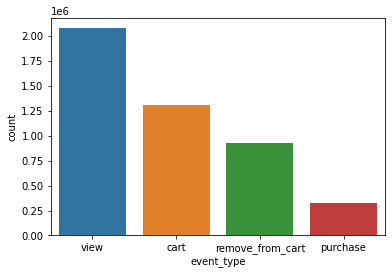

In [38]:
sns.countplot(x='event_type', data=data)

q6

In [39]:
data= data.dropna(subset = ["user_id"])
users_data = data.sort_values(['user_id', 'event_time'])

users_data['session'] = (pd.to_datetime(users_data['event_time']) - pd.to_datetime(users_data.groupby('user_id')['event_time'].shift(1))).dt.total_seconds().fillna(0)
users_data['session'] = (users_data['session'] > 1800).cumsum()
# סינון לפי אירועי צפייה במוצר, הוספה לעגלה ורכישה
users_data = users_data[users_data['event_type'].isin(['view', 'cart', 'purchase'])]

session_data2 = users_data.groupby(['user_id', 'session','event_type']).agg({
      'product_id': lambda x: list(x), } ).reset_index()
session_data2 =session_data2.groupby(['user_id', 'session', 'event_type'])['product_id'].first().unstack('event_type').reset_index()


session_data1 = users_data.groupby(['user_id', 'session']).agg(
    user_session=('session', 'first'),
    funnel_number=('funnel_number', 'first'),
    index_in_funnel=('index_in_funnel', 'first'),
    number_of_events=('event_time', lambda x: len(x)),
    session_duration_seconds =('event_time', lambda x: (pd.to_datetime(x.max()) - pd.to_datetime(x.min())).seconds))


session_data = pd.merge(session_data1, session_data2, on=['user_id','session'])
session_data = session_data.drop(columns=['session'])
session_data = session_data.rename(columns={'cart': 'list_of_added_to_cart', 'view': 'list_of_viewed','purchase': 'list_of_purchased'})

In [47]:
session_data

,user_id,user_session,funnel_number,index_in_funnel,number_of_events,session_duration_seconds,list_of_added_to_cart,list_of_purchased,list_of_viewed
0,1120748,0,1,1,1,0,NaN,NaN,[5240]
1,1458813,0,1,1,1,0,NaN,NaN,[5711145]
2,1458813,1,1,2,1,0,NaN,NaN,[5814066]
3,1458813,2,1,3,28,3789,NaN,NaN,"[5800358, 5800349, 5800349, 5800358, 5712576, ..."
4,1458813,3,1,31,1,0,NaN,NaN,[5711087]
...,...,...,...,...,...,...,...,...,...
654147,579967088,293225,1,1,1,0,NaN,NaN,[5881428]
654148,579968012,293225,1,1,1,0,NaN,NaN,[5873630]
654149,579968623,293225,1,1,5,38,NaN,NaN,"[5892179, 5886282, 5892179, 5900651, 5892179]"
654150,579968937,293225,1,1,1,0,NaN,NaN,[5790563]
